In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
from pandas.plotting import scatter_matrix

In [3]:
#A continuacion leemos la informacion del .xlsx y mostramos sus primeras 3 filas:
data = pd.read_excel('homicidios.xlsx')
data.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [4]:
#Mostramos em forma de lista todas las columnas y el numero de datos nulos que tiene cada una de ellas
data.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [5]:
#mostramos ahora la frecuencia de aparición de cada valor único en una columna. 
data.value_counts


<bound method DataFrame.value_counts of             ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
0    2016-0001           1 2016-01-01  2016   1   1  04:00:00   4   
1    2016-0002           1 2016-01-02  2016   1   2  01:15:00   1   
2    2016-0003           1 2016-01-03  2016   1   3  07:00:00   7   
3    2016-0004           1 2016-01-10  2016   1  10  00:00:00   0   
4    2016-0005           1 2016-01-21  2016   1  21  05:20:00   5   
..         ...         ...        ...   ...  ..  ..       ...  ..   
691  2021-0093           1 2021-12-13  2021  12  13  17:10:00  17   
692  2021-0094           1 2021-12-20  2021  12  20  01:10:00   1   
693  2021-0095           1 2021-12-30  2021  12  30  00:43:00   0   
694  2021-0096           1 2021-12-15  2021  12  15  10:30:00  10   
695  2021-0097           1 2021-11-18  2021  11  18  06:10:00   6   

                               LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  Altura  \
0    AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       A

ACUSADO
AUTO           204
PASAJEROS      173
CARGAS         146
OBJETO FIJO     62
MOTO            57
SD              23
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64


<Axes: >

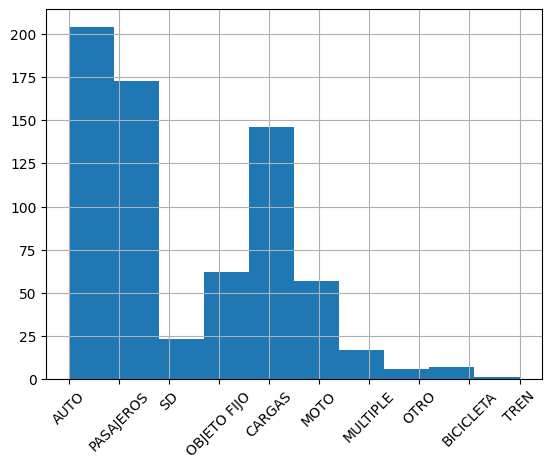

In [17]:
frecuencias = data["ACUSADO"].value_counts()

# Rotar las etiquetas 45 grados
plt.xticks(rotation=45)

# Mostrar las frecuencias
print(frecuencias)
data["ACUSADO"].hist()

VICTIMA
MOTO           295
PEATON         264
AUTO            83
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64


<Axes: >

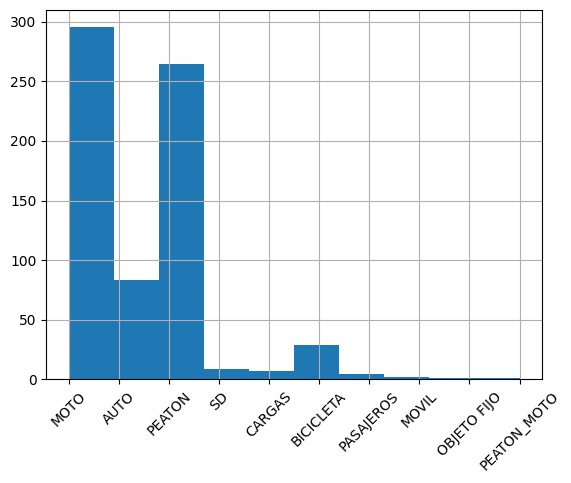

In [18]:
frecuencias = data["VICTIMA"].value_counts()

# Rotar las etiquetas 45 grados
plt.xticks(rotation=45)

# Mostrar las frecuencias
print(frecuencias)
data["VICTIMA"].hist()

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64


<Axes: >

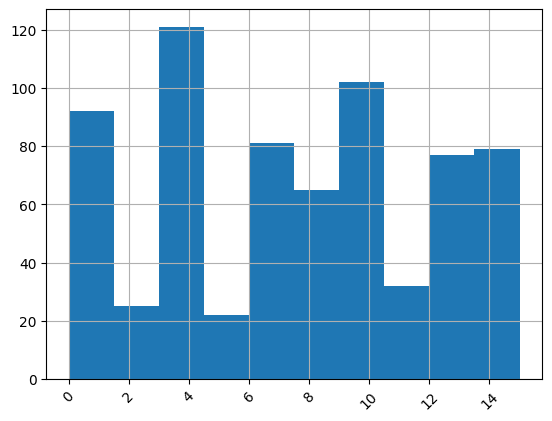

In [22]:
frecuencias = data["COMUNA"].value_counts()

# Rotar las etiquetas 45 grados
plt.xticks(rotation=45)

# Mostrar las frecuencias
print(frecuencias)
data["COMUNA"].hist()

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64


<Axes: >

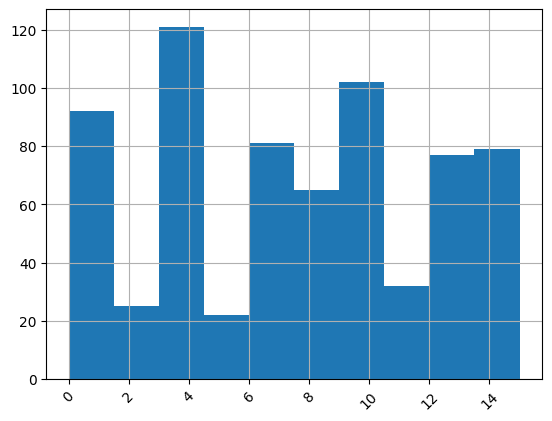

In [25]:
frecuencias = data["COMUNA"].value_counts()

# Rotar las etiquetas 45 grados
plt.xticks(rotation=45)

# Mostrar las frecuencias
print(frecuencias)
data["COMUNA"].hist()

# Apartir de aqui la intencion es hacer un mapa de calor de donde ocurren mas accidentes 

In [27]:
data.dtypes

ID                               object
N_VICTIMAS                        int64
FECHA                    datetime64[ns]
AAAA                              int64
MM                                int64
DD                                int64
HORA                             object
HH                               object
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
Calle                            object
Altura                          float64
Cruce                            object
Dirección Normalizada            object
COMUNA                            int64
XY (CABA)                        object
pos x                            object
pos y                            object
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
dtype: object

In [28]:
data.describe

<bound method NDFrame.describe of             ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
0    2016-0001           1 2016-01-01  2016   1   1  04:00:00   4   
1    2016-0002           1 2016-01-02  2016   1   2  01:15:00   1   
2    2016-0003           1 2016-01-03  2016   1   3  07:00:00   7   
3    2016-0004           1 2016-01-10  2016   1  10  00:00:00   0   
4    2016-0005           1 2016-01-21  2016   1  21  05:20:00   5   
..         ...         ...        ...   ...  ..  ..       ...  ..   
691  2021-0093           1 2021-12-13  2021  12  13  17:10:00  17   
692  2021-0094           1 2021-12-20  2021  12  20  01:10:00   1   
693  2021-0095           1 2021-12-30  2021  12  30  00:43:00   0   
694  2021-0096           1 2021-12-15  2021  12  15  10:30:00  10   
695  2021-0097           1 2021-11-18  2021  11  18  06:10:00   6   

                               LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  Altura  \
0    AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA